# Team Allocation Simulator #
by Ewen, Wei Hao, Zerius, Youde, Shawn

## Resources provided ##
We have received a CSV file 'records.csv', which have given us the following information of each of the 6000 students
1. The students' name
2. The students' ID
3. The students' tutorial group
4. The students' gender
5. The students' school affiliation
6. The students' current CGPA

## Requirements ##
We are to develop an application that does the following 
1. Organize students into teams of five
2. Team members should be in the same tutorial group
3. No team should have a majority of students from the same school
4. No team should have a majority of students of the same gender
5. No team should not consist predominantly of students with very high or very low CGPAs 

## Thought Process for Team Allocation Simulator ##

To develop a robust and efficient Team Allocation Simulator, we adopted the cornerstones of Critical Thinking for Computing. This approach provided a structured guide for analyzing the problem and creating an effective solution.

### Decomposition ###
The first step was to decompose the complex problem into manageable sub-tasks. Considering the various requirements for team formation, we evaluated different approaches for grouping students and identified the following optimal process:

- Split the students by tutorial groups.
- Within each tutorial group, split the students by gender.
- Sort students within each gender group by CGPA.
- Select students according to the determined selection strategy.

By breaking the problem into these steps, we were able to develop a clear path for implementation, ensuring each requirement is addressed methodically.

### Abstraction ###
To simplify the extraction and management of student information, we chose to represent each student’s data as a dictionary. These dictionaries are stored within lists to facilitate sequential, mutable data access. This decision was based on the need for flexible data structures that allow easy data manipulation and retrieval.

### Patterns ###
We anticipated that the student selection process would be the most sophisticated part of the algorithm. Thus, we analyzed the potential patterns within this procedure to simplify and optimize it.

Methodology for Student Selection:

1. Start by selecting the student with the lowest CGPA from the gender group with more students.
2. Alternate by choosing the student with the highest CGPA from the opposite gender.
3. Continue with the student who has the median CGPA from the initial gender group.
4. Repeat the process, ensuring a 3:2 gender ratio and varied school affiliations.
5. This approach ensures that each group has balanced CGPA levels, gender diversity, and students from different schools. The team composition pattern follows the order:

```
[LowestFemale, HighestMale, MedianFemale, LowestMale, HighestFemale]
```
Handling School Affiliation Duplicates: If a selected student shares the same school affiliation as another team member, the algorithm selects the next-best candidate (e.g., the second lowest/highest CGPA). This adjustment continues until a suitable candidate is found.

Indexing Pattern:

The indexes used for selection are [0, -1, len(sorted_student[gender_index]) // 2], corresponding to the lowest, highest, and median positions in the gender group.
Changes in the index are tracked using index_changes = [+1, -1, +1], and a variable cycles through the indexes to maintain the selection pattern.

### Algorithms ###
To build the Team Allocation Simulator, we outlined the following procedural steps:

Develop a CSV reading function: Extract and organize student data from the CSV file into dictionaries within lists.
Create a function to sort students by tutorial group: This ensures that students are initially grouped according to their assigned tutorial.
Develop a team allocation function: This function distributes students into balanced teams while considering gender ratio, CGPA distribution, and school diversity.
Implement a sorting function by gender and CGPA: This function organizes students within their tutorial groups into separate lists based on gender and then sorts them by CGPA.
This structured workflow is designed to meet all project requirements and maintain efficiency in forming teams.

Conclusion
By following these steps, we believe our approach effectively balances the criteria of CGPA, gender, and school diversity in each team. The use of dictionaries and lists simplifies data handling, while the patterned selection process ensures a logical and fair distribution of students. The thought process outlined above demonstrates how decomposition, abstraction, pattern recognition, and algorithmic planning were integral to our project’s development.



## Function to Read CSV File ##
We will first create a function to read the CSV. It will then add each student's information (those listed above) into a dictionary. The dictionaries of the students' details will be stored in a list.

### Pseudocode for read_student_data ###

<font color='green'>FUNCTION</font> read_student_data(file_path):
<br>&emsp;<font color='green'>INITIALISE</font> students_list as an empty list
<br>
<br>&emsp;<font color='green'>OPEN</font> file at file_path in read mode AS file
<br>&emsp;&emsp;<font color='green'>READ</font> the first line and split it by commas, ASSIGN it to headers
<br>
<br>&emsp;&emsp;<font color='green'>FOR EACH</font> line <font color='blue'>IN</font> file:
<br>&emsp;&emsp;&emsp;<font color='green'>INITIALISE</font> student as an empty dictionary
<br>&emsp;&emsp;&emsp;<font color='green'>SPLIT</font> line by commas, ASSIGN it to values
<br>
<br>&emsp;&emsp;&emsp;<font color='green'>FOR EACH</font> index i and header <font color='blue'>IN</font> headers:
<br>&emsp;&emsp;&emsp;&emsp;<font color='green'>SET</font> student[header.strip()] to values[i].strip()
<br>&emsp;&emsp;&emsp;&emsp;<font color='green'>IF</font> header.strip() is equal to "CGPA":
<br>&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>CONVERT</font> student[header.strip()] to float
<br>
<br>&emsp;&emsp;&emsp;<font color='green'>APPEND</font> student to students_list
<br>
<br>&emsp;<font color='green'>RETURN</font> students_list;


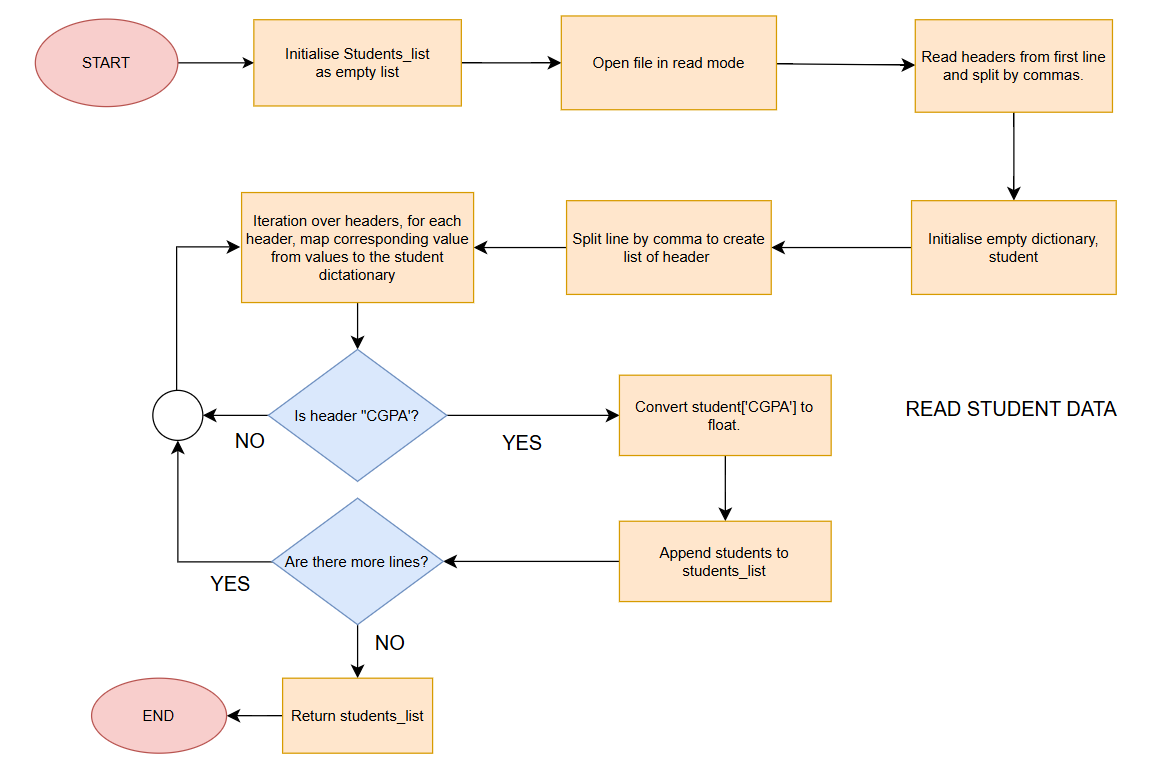

In [2]:
from IPython import display
display.Image("assets/Flowchart_read student data.png")

## Function to Sort Students By Tutorial Groups ##
Since the members of each group should be in the same tutorial group, we decided that it would be more efficient to meet this requirement first. In this function, we have split the dictionaries of each student to lists of their own respective tutorial groups.

### Pseudocode for Function, pick_student ###

<font color='green'>FUNCTION</font> pick_student(all_students, tut_grp):
<br>&emsp;<font color='green'>INITIALISE</font> students_list as an empty list
<br>
<br>&emsp;<font color='green'>FOR EACH</font> student <font color='blue'>IN</font> all_students
<br>&emsp;&emsp;<font color='green'>IF</font> student's 'Tutorial Group' is equal to <font color='blue'>'G-{tut_grp}'</font>
<br>&emsp;&emsp;&emsp;<font color='green'>APPEND</font> student to students_list
<br>
<br>&emsp;<font color='green'>RETURN</font> students_list


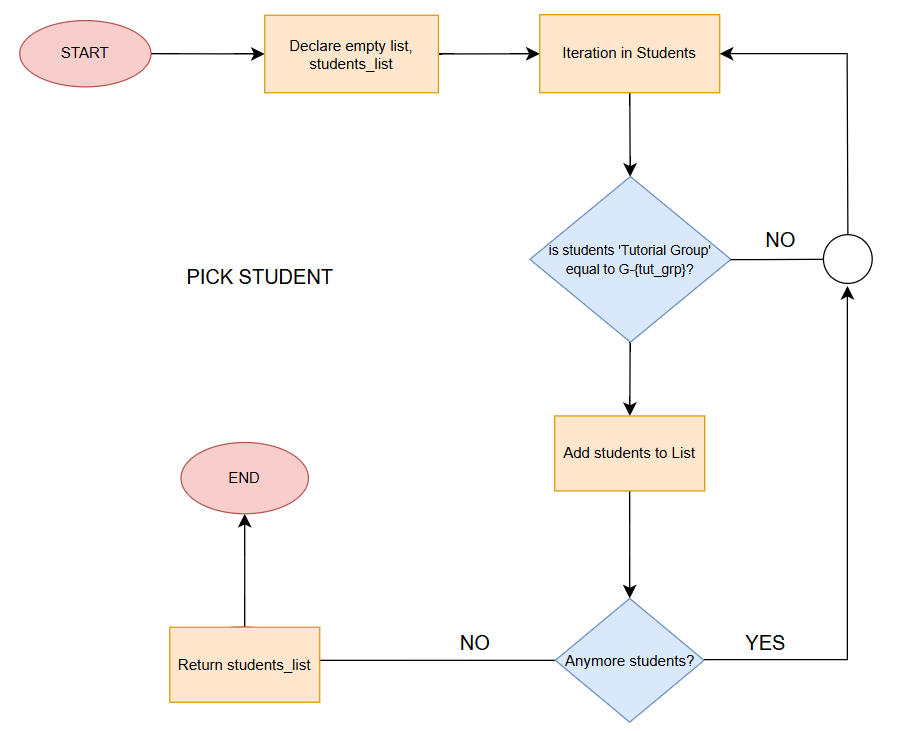

In [27]:
display.Image("assets/Flowchart_pick_student.png")

## Function to form a team of 5 students ##
We will now design a function to form a team of 5 students. This function will have 2 parameters, a list with male students with their CGPA sorted, as well as a list with female students with their CGPA sorted. We will implement another function later for the sorting of gender and CGPA.

For this function, we will be primarily be focussing on how we would ensure teams would have students with different school affliations, and how we would balance out the CGPA and gender in each group. We would heavily use pattern recognition to build this function.

We will first pick a student with the lowest CGPA amongst gender X, where gender X has more students. We will then select a student of opposite gender with the highest CGPA. The next student selected would have the median CGPA amongst gender X. The first step repeats again. This effectively allows for a good mix of CGPA in a group, while ensuring there will be a 3:2 ratio for the gender and that students have different school affiliations. The team composition will look something like this:
```
LowestFemale, HighestMale, MedianFemale, LowestMale, HighestFemale
```

In the event where the student selected has the same school affliation as another student already in the group, the function will choose the next best alternative
> If the next female student with the lowest CGPA has the same school affiliation with another student in the group, the second lowest CGPA female student will be selected instead. If the second lowest CGPA female student also has same school affilation with another student in the group, the third lowest CGPA female student will be selected, and so on.

However, to ensure that the mean of CGPA does not differ alot between teams, we would stop the changing of index after it increases by 5. This also ensures that the mixture of CGPA will not affect other teams as well.

Most tutorial groups will not be in a perfect 3:2 gender ratio for us to distribute them evenly. Hence, we have devised a way to ensure that 4:1 teams will be formed instead until the 3:2 ratio in the tutorial groups is formed. The remaining students will then be able to form 3:2 teams.
> If there are 35 female and 15 male students in the tutorial group, 5 4:1 teams will be formed first. the remaining 5 teams will have a ratio of 3:2.

### Pseudocode for Function ###
<font color='green'>FUNCTION</font> diverse_team(sorted_student_more, sorted_student_less)<br>
&emsp;<font color='green'>INITIALISE</font> team <font color='green'>AS</font> an empty list<br>
&emsp;<font color='green'>SET</font> i <font color='green'>TO</font> 0<br>
&emsp;<font color='green'>INITIALISE</font> sorted_student <font color='green'>AS</font> a list containing sorted_student_more and sorted_student_less<br>

&emsp;<font color='green'>SET</font> gender_run_two_time <font color='green'>TO</font> FALSE<br>
&emsp;<font color='green'>SET</font> next_gender_same <font color='green'>TO</font> FALSE<br>
&emsp;<font color='green'>IF</font> (length of sorted_student_more - length of sorted_student_less >= 10-team_index) <font color='green'>THEN</font><br>
&emsp;&emsp;<font color='green'>SET</font> gender_run_two_time <font color='green'>TO</font> TRUE

&emsp;<font color='green'>SET</font> gender_index <font color='green'>TO</font> 0<br>

&emsp;<font color='green'>WHILE</font> (length of team < 5) <font color='blue'>AND</font> (sorted_student[0] <font color='blue'>OR</font> sorted_student[1])<br>
&emsp;&emsp;<font color='green'>WHILE</font> index_changes <font color='green'>TO</font> [+1, -1, +1]<br>
&emsp;&emsp;<font color='green'>SET</font> pick_index <font color='green'>TO</font> [0, -1, length of sorted_student[gender_index] // 2]<br>

&emsp;&emsp;<font color='green'>WHILE</font> TRUE<br>
&emsp;&emsp;&emsp;<font color='green'>IF</font> sorted_student[gender_index] is empty <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>BREAK</font><br>

&emsp;&emsp;&emsp;<font color='green'>IF</font> (index_changes[i] >= 0) <font color='blue'>AND</font> (pick_index[i] + index_changes[i] < length of sorted_student[gender_index] <font color='blue'>AND</font> index_changes[i] <= 5 <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>IF</font> sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] <font color='blue'>NOT</font> <font color='green'>IN</font> [student['School'] <font color='green'>FOR</font> student <font color='green'>IN</font> team] <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>APPEND</font> sorted_student[gender_index].<font color='green'>POP</font>(pick_index[i] + index_changes[i]) <font color='green'>TO</font> team<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>BREAK</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>ELSE</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>INCREMENT</font> index_changes[i] <font color='green'>BY</font> 1<br>
&emsp;&emsp;&emsp;<font color='green'>ELSE IF</font> (index_changes[i] < 0) <font color='blue'>AND</font> (ABS(pick_index[i] + index_changes[i]) <= length of sorted_student[gender_index]) <font color='blue'>AND</font> (ABS(index_changes[i]) <= 5) <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>IF</font> (sorted_student[gender_index][pick_index[i] + index_changes[i]]['School']) <font color='blue'>NOT</font> <font color='green'>IN</font> [student['School'] <font color='green'>FOR</font> student <font color='green'>IN</font> team] <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>APPEND</font> sorted_student[gender_index].<font color='green'>POP</font>(pick_index[i] + index_changes[i]) <font color='green'>TO</font> team<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>BREAK</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>ELSE</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>DECREMENT</font> index_changes[i] <font color='green'>BY</font> 1<br>
&emsp;&emsp;&emsp;<font color='green'>ELSE</font><br>
&emsp;&emsp;&emsp;&emsp;&emsp;<font color='green'>APPEND</font> sorted_student[gender_index].<font color='green'>POP</font>(pick_index[i]) <font color='green'>TO</font> team<br>
&emsp;&emsp;&emsp;&emsp;&emsp;BREAK<br>

&emsp;&emsp;<font color='green'>INCREMENT</font> i <font color='green'>BY</font> 1

&emsp;&emsp;<font color='green'>IF</font> <font color='blue'>NOT</font> next_gender_same <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;<font color='green'>INCREMENT</font> gender_index <font color='green'>BY</font> 1

&emsp;&emsp;<font color='green'>ELSE IF</font> next_gender_same <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;<font color='green'>SET</font> next_gender_same <font color='green'>TO</font> FALSE

&emsp;&emsp;<font color='green'>IF</font> i is greater than 2 <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;<font color='green'>SET</font> i <font color='green'>TO</font> 0

&emsp;&emsp;<font color='green'>IF</font> gender_index is greater than 1 <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;<font color='green'>SET</font> gender_index <font color='green'>TO</font> 0

&emsp;&emsp;<font color='green'>IF</font> gender_run_two_time <font color='green'>THEN</font><br>
&emsp;&emsp;&emsp;<font color='green'>SET</font> gender_index <font color='green'>TO</font> 0<br>
&emsp;&emsp;&emsp;<font color='green'>SET</font> gender_run_two_time <font color='green'>TO</font> TRUE<br>
&emsp;&emsp;&emsp;<font color='green'>SET</font> next_gender_same <font color='green'>TO</font> TRUE

&emsp;<font color='green'>RETURN</font> team<br>

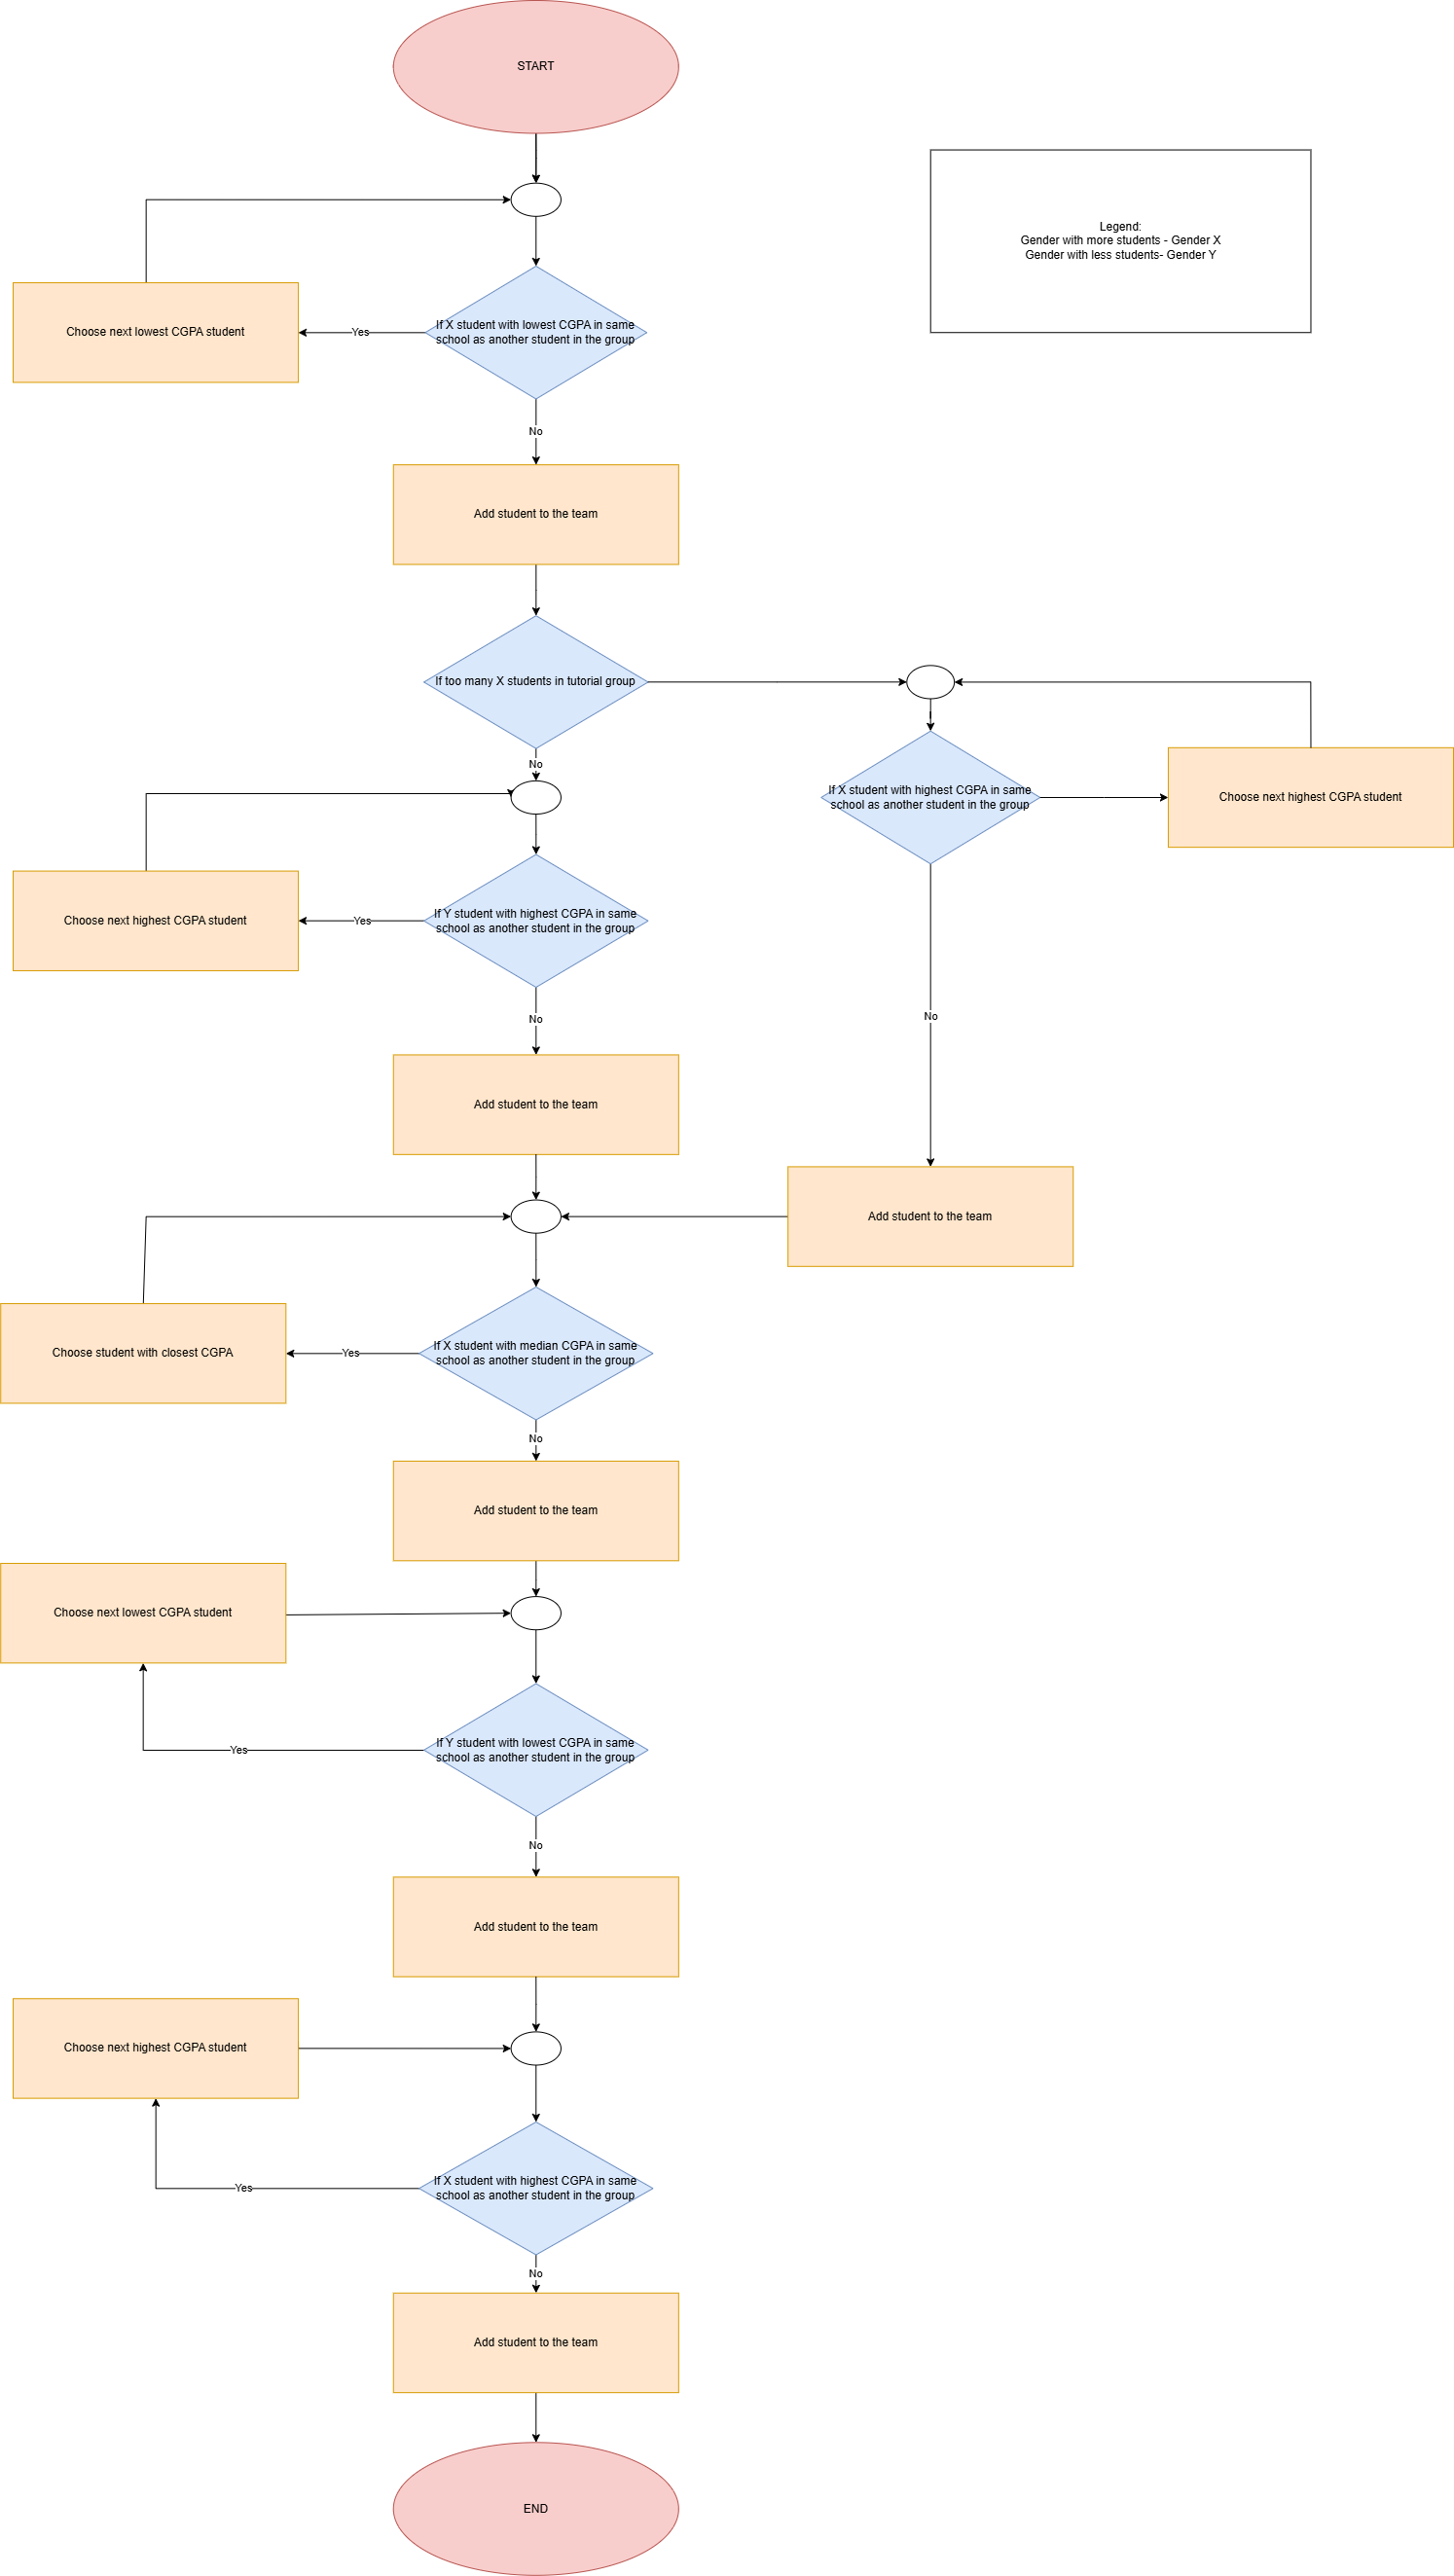

In [4]:
display.Image("assets/Flowchart_diverse_teams.png")

## Function to Sort by Gender and CGPA (Division into team) ##
This function would split students by their gender into 2 lists. Each list will then be sorted by CGPA. The function will determine whether the tutorial group has more males or femeles, and the lists produced will then be used as diverse_team parameters. 
The function will return the groups formed in lists, nested in a whole list.

### Pseudocode for the Function (division_into_team) ###
<font color='green'>FUNCTION </font> division_into_team(students_list) 
<br><font color='green'>INITIALISE</font> male_students, to get male students in student_lists if gender equates to 'Male'
<br><font color='green'>INITIALISE</font> female_students, to get female students in student_list if gender equates to 'Female'
<br><font color='green'>INITIALISE</font> male_sorted_students, sorted students from male_students
<br><font color='green'>INITIALISE</font> female_sorted_students, sorted students from female_students
<br><font color='green'>INITIALISE</font> teams, creating a list of empty teams
<br><font color='green'>INITIALISE</font> team_index, indicating the number of teams that have students added
<br>
<br><font color='green'>WHILE</font> <font color='red'>(number of teams with students added)</font> less than <font color='blue'>(the number of empty lists created)</font>
<br>&emsp;&emsp;<font color='green'>IF</font> <font color='red'>(number of male students)</font> is more than or equal to <font color='blue'>(number of female students)</font>
<br>&emsp;&emsp;&emsp;<font color='green'>CALL</font> diverse_team(male_sorted_students, female_sorted_students)
<br>&emsp;&emsp;<font color='green'>ELSE</font>
<br>&emsp;&emsp;&emsp;<font color='green'>CALL</font> diverse_team(female_sorted_students, male_sorted_students)
<br>&emsp;&emsp;<font color='green'>INCREMENT</font> team_index by 1
<br>
<br><font color='green'>RETURN</font> teams


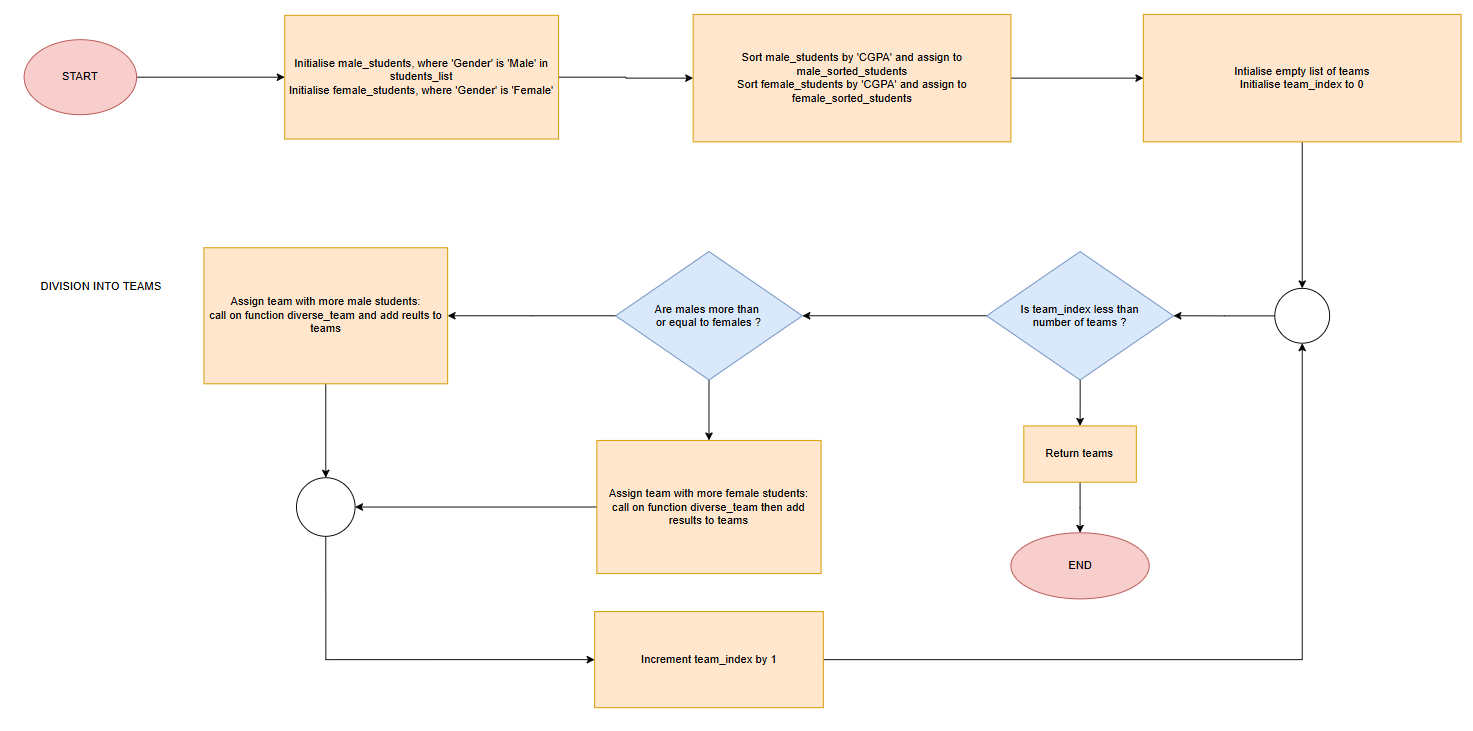

In [30]:
display.Image("assets/Flowchart_division into team.png")

## Main Code ##

### Pseudocode for the Main ###
<font color='green'>INITIALISE</font> students, by reading student data from 'records.csv'
<br><font color='green'>INITIALISE</font> group_division, as an empty list
<br><font color='green'>INITIALISE</font> tutorial_grp, to 1 (starting tutorial group)
<br>
<br><font color='green'>WHILE</font> <font color='red'>(tutorial_grp)</font> is less than or equal to <font color='blue'>150</font>
<br>&emsp;&emsp;<font color='green'>CALL</font> pick_student(students, tutorial_grp)
<br>&emsp;&emsp;<font color='green'>CALL</font> division_into_team with the picked students
<br>&emsp;&emsp;<font color='green'>EXTEND</font> group_division with the resulting teams
<br>&emsp;&emsp;<font color='green'>INCREMENT</font> tutorial_grp by 1
<br>

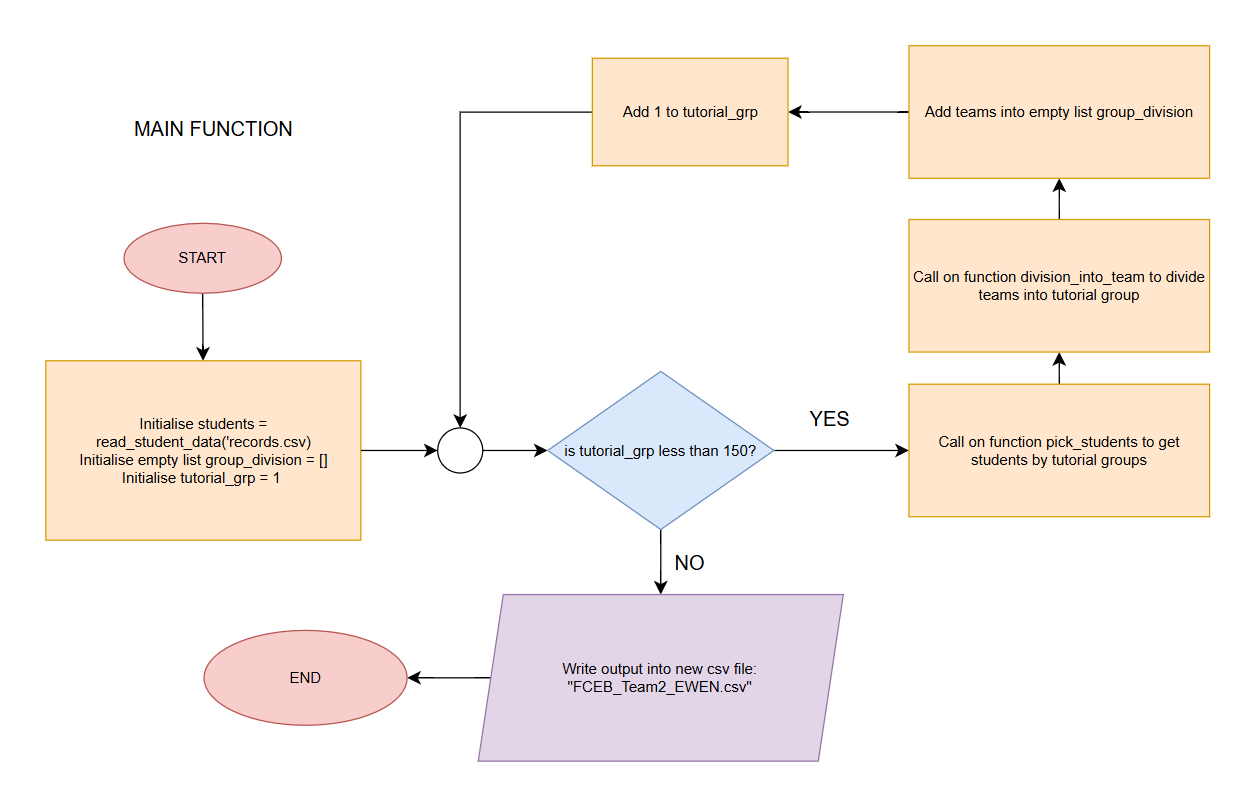

In [29]:
display.Image("assets/Flowchart_Main Code.png")

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Visualisation of code #

### Gender Representation ###

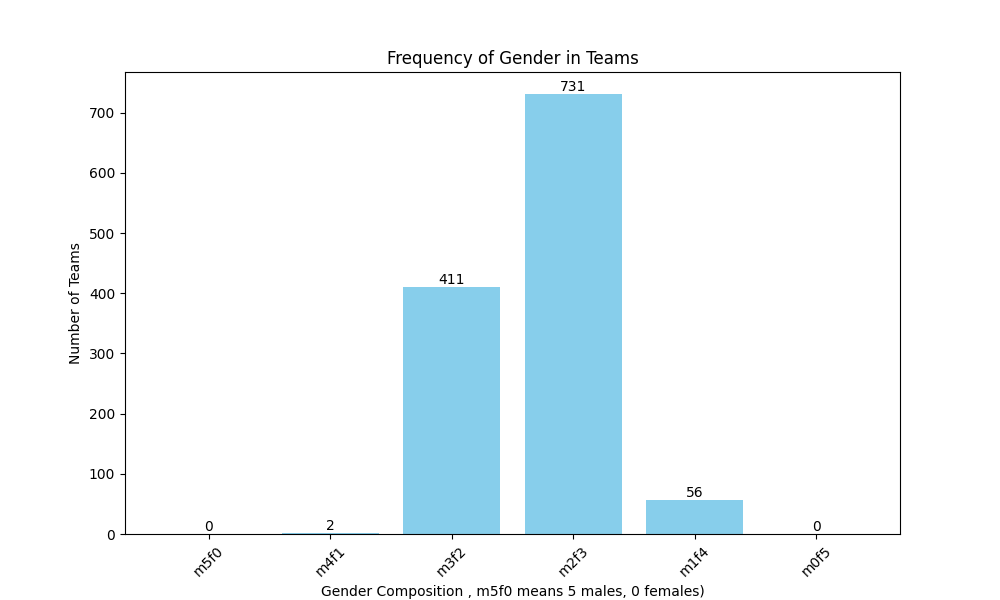

In [11]:
display.Image("assets/gender_representation.png")

### Histogram for Mean CGPA Per Team ###

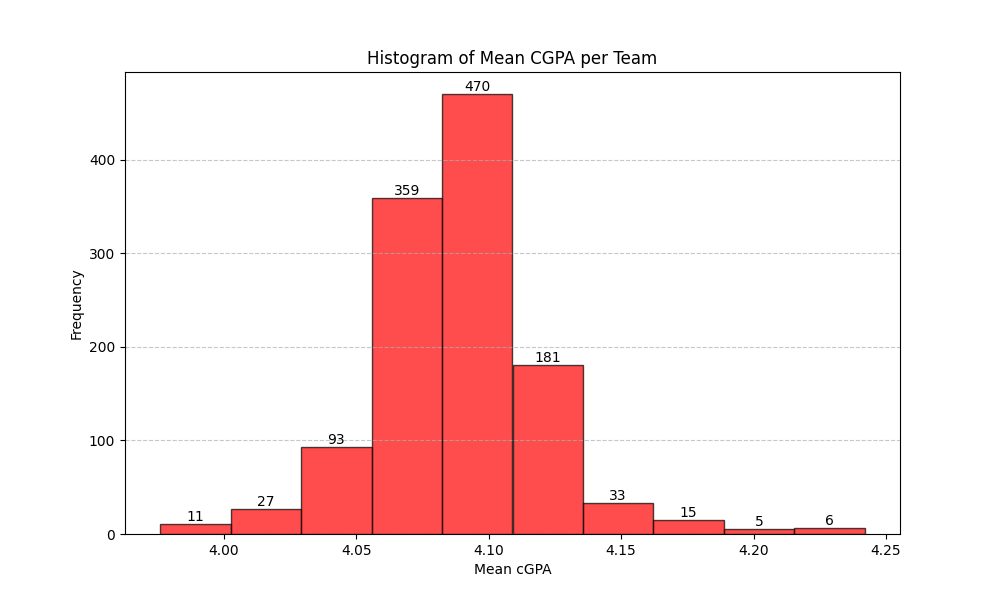

In [12]:
display.Image("assets/Histogram_for_Mean_CGPA_Per_Team.png")

### Histogram_for_Standard_Deviation_Per_Team.png ###

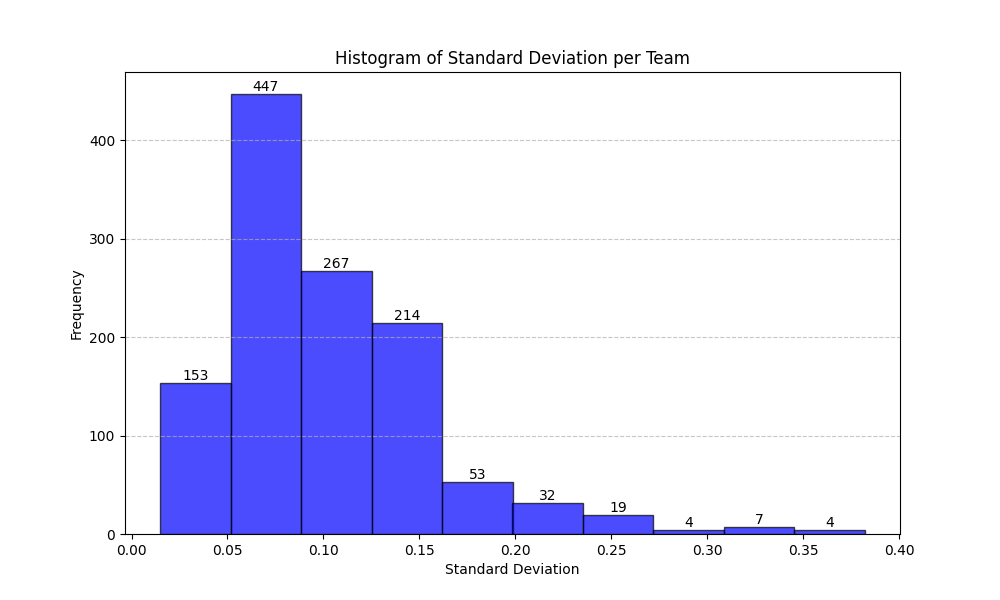

In [18]:
display.Image("assets/Histogram_for_Standard_Deviation_Per_Team.png")

### Histogram_of_Z-Scores_for_Mean_CGPA_per_Team ###

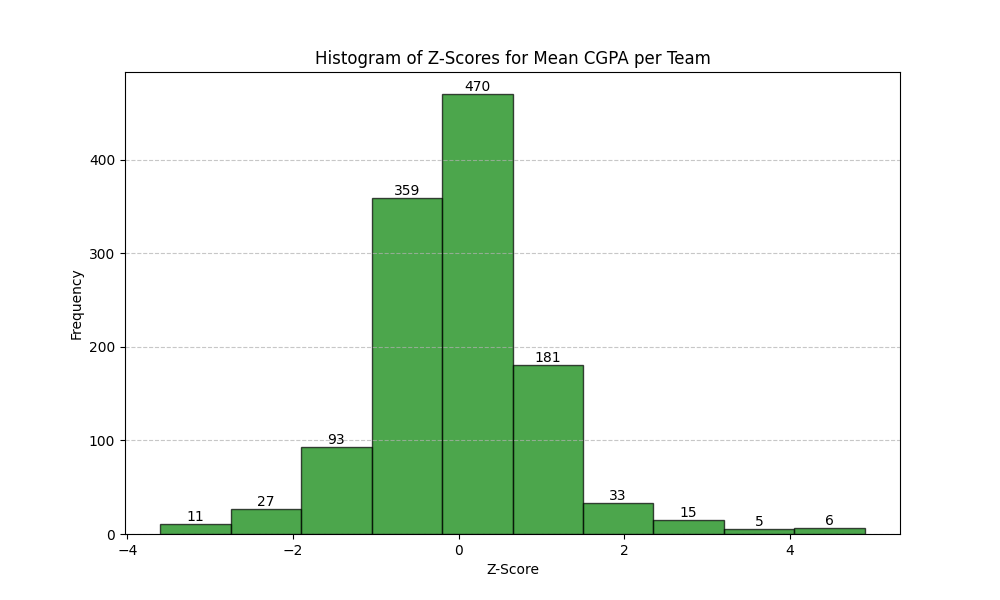

In [21]:
display.Image("assets/Histogram_of_Z-Scores_for_Mean_CGPA_per_Team.png")

### School Representation ###

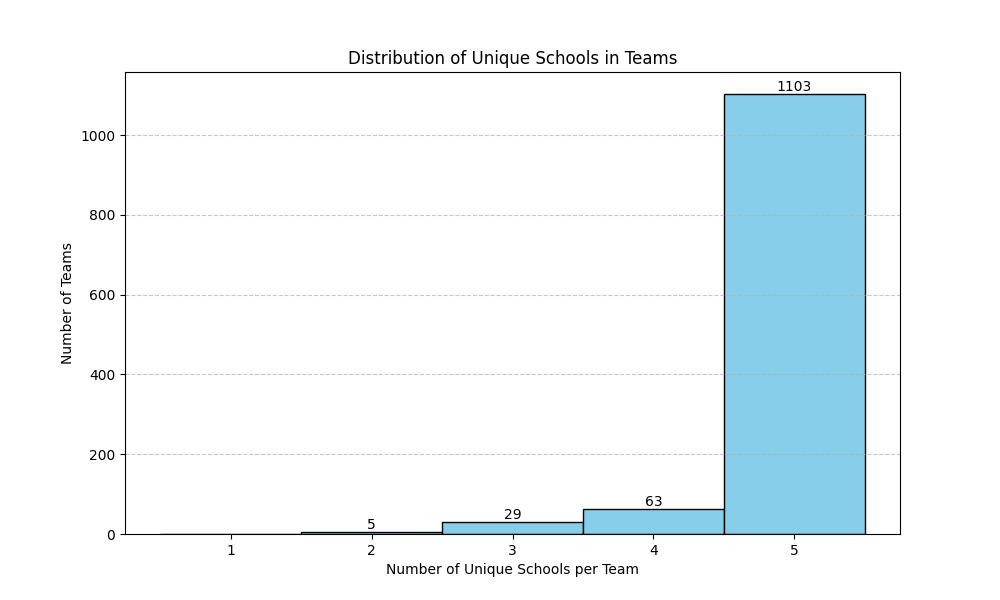

In [22]:
display.Image("assets/school_representation.png")

<br><br><br><br><br><br><br><br><br><br>

# Code #
We had code 2 version, one is the basic code, another one is the advanced code where user can choose number of student in a group

## Basic Code

In [11]:
def read_student_data(file_path):
    """Read data from csv file and return"""
    students_list = []
    with open(file_path, mode='r') as file:
        headers = file.readline().strip().split(",")
        for line in file:
            student = {}
            values = line.strip().split(",")
            for i, header in enumerate(headers):
                student[header.strip()] = values[i].strip()
                if header.strip() == "CGPA":
                    student[header.strip()] = float(student[header.strip()])

            students_list.append(student)

    return students_list


def pick_student(all_students, tut_grp):
    """pick student out from the tutorial group"""
    students_list = []

    for student in all_students:
        if student['Tutorial Group'] == f'G-{tut_grp}':
            students_list.append(student)

    return students_list


def diverse_team(sorted_student_more, sorted_student_less, team_index):  # index(0,-1,or middle)
    team = []
    i = 0  # round
    sorted_student = [sorted_student_more, sorted_student_less]

    gender_run_two_time = False
    next_gender_same = False
    if len(sorted_student_more) - len(sorted_student_less) >= 10-team_index:
        gender_run_two_time = True

    gender_index = 0

    while len(team) < 5 and (sorted_student[0] or sorted_student[1]):  # add student into team when teams is not full
        index_changes = [+1, -1, +1]
        pick_index = [0, -1, len(sorted_student[gender_index]) // 2]
        while True:
            if not sorted_student[gender_index]:
                break
            elif index_changes[i] >= 0 and pick_index[i] + index_changes[i] < len(sorted_student[gender_index]) and index_changes[
                i] <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] += 1
            elif index_changes[i] < 0 and abs(pick_index[i] + index_changes[i]) <= len(sorted_student[gender_index]) and abs(
                    index_changes[i]) <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] -= 1
            else:
                # If the index exceeds the list length, reset index_changes or break
                team.append(sorted_student[gender_index].pop(pick_index[i]))
                break

        i += 1
        if not next_gender_same:
            gender_index += 1
        elif next_gender_same:
            next_gender_same = False
        if i > 2:
            i = 0
        if gender_index > 1:
            gender_index = 0

        if gender_run_two_time:
            gender_index = 0
            gender_run_two_time = False
            next_gender_same = True

    return team


def division_into_team(students_list):
    """Divides student from student_list into group of 5 with balance of cgpa and gender, and diverse of school"""
    # Separate male and female students into two lists
    male_students = [student for student in students_list if student['Gender'] == 'Male']
    female_students = [student for student in students_list if student['Gender'] == 'Female']

    # Sort the male and female students by CGPA
    male_sorted_students = sorted(male_students, key=lambda student: student['CGPA'])
    female_sorted_students = sorted(female_students, key=lambda student: student['CGPA'])

    teams = [[] for _ in range(len(students_list) // 5)]
    team_index = 0

    while team_index < len(teams):  # while haven't added student into all teams
        if len(male_sorted_students) >= len(female_sorted_students):  # if remain male student more than remain female student
            teams[team_index] = diverse_team(male_sorted_students, female_sorted_students, team_index)

        else:  # if remain male student less than remain female student
            teams[team_index] = diverse_team(female_sorted_students, male_sorted_students, team_index)

        team_index += 1

    return teams


students = read_student_data('records.csv')
group_division = []
tutorial_grp = 1

while tutorial_grp <= 120:
    group_division.extend(division_into_team(pick_student(students, tutorial_grp)))
    tutorial_grp += 1
    
with open("group_division.csv", mode="w") as f:
    f.write("Tutorial Group,Group Number,Student ID,School,Name,Gender,CGPA\n")

    for group_num, group in enumerate(group_division,start=1):
        for student in group:
            l = f"{student['Tutorial Group']},{group_num},{student['Student ID']},{student['School']},{student['Name']},{student['Gender']},{student['CGPA']}\n"
            f.write(l)

<br><br><br><br><br><br><br><br>

## Advanced Code ##

In [12]:
from ipywidgets import IntSlider, interact


def read_student_data(file_path):
    """Read data from csv file and return"""
    students_list = []
    with open(file_path, mode='r') as file:
        headers = file.readline().strip().split(",")
        for line in file:
            student = {}
            values = line.strip().split(",")
            for i, header in enumerate(headers):
                student[header.strip()] = values[i].strip()
                if header.strip() == "CGPA":
                    student[header.strip()] = float(student[header.strip()])

            students_list.append(student)

    return students_list


def pick_student(all_students, tut_grp):
    """pick student out from the tutorial group"""
    students_list = []

    for student in all_students:
        if student['Tutorial Group'] == f'G-{tut_grp}':
            students_list.append(student)

    return students_list


def diverse_team(size_team, sorted_student_more, sorted_student_less,team_index,len_team):  # size of team, index(0,-1,or middle)
    team = []
    i = 0  # round
    sorted_student = [sorted_student_more, sorted_student_less]

    gender_run_two_time = False
    next_gender_same = False
    if (size_team%2 == 0) or len(sorted_student_more) - len(sorted_student_less) >= ((((size_team//2)+1)*len_team) -((size_team//2)*len_team))-team_index:
        gender_run_two_time = True

    gender_index = 0

    while len(team) < size_team and (sorted_student[0] or sorted_student[1]):  # add student into team when teams is not full
        index_changes = [+1, -1, +1]
        pick_index = [0, -1, len(sorted_student[gender_index]) // 2]
        while True:
            if not sorted_student[gender_index]:
                break
            elif index_changes[i] >= 0 and pick_index[i] + index_changes[i] < len(sorted_student[gender_index]) and index_changes[
                i] <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] += 1
            elif index_changes[i] < 0 and abs(pick_index[i] + index_changes[i]) <= len(sorted_student[gender_index]) and abs(
                    index_changes[i]) <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] -= 1
            else:
                # If the index exceeds the list length, reset index_changes or break
                team.append(sorted_student[gender_index].pop(pick_index[i]))
                break

        i += 1
        if not next_gender_same:
            gender_index += 1
        elif next_gender_same:
            next_gender_same = False
        if i > 2:
            i = 0
        if gender_index > 1:
            gender_index = 0

        if gender_run_two_time:
            gender_index = 0
            gender_run_two_time = False
            next_gender_same = True

    return team


def division_into_team(students_list, size):
    """Divides student from student_list into group of size with balance of cgpa and gender, and diverse of school"""
    # Separate male and female students into two lists
    male_students = [student for student in students_list if student['Gender'] == 'Male']
    female_students = [student for student in students_list if student['Gender'] == 'Female']

    # Sort the male and female students by CGPA
    male_sorted_students = sorted(male_students, key=lambda student: student['CGPA'])
    female_sorted_students = sorted(female_students, key=lambda student: student['CGPA'])

    teams = [[] for _ in range(len(students_list) // size)]
    team_index = 0

    while team_index < len(teams):  # while haven't added student into all teams
        if len(male_sorted_students) >= len(female_sorted_students):  # if remain male student more than remain female student
            teams[team_index] = diverse_team(size, male_sorted_students, female_sorted_students,team_index,len(teams))

        else:  # if remain male student less than remain female student
            teams[team_index] = diverse_team(size, female_sorted_students, male_sorted_students,team_index,len(teams))

        team_index += 1

    first_run = True
    while male_sorted_students or female_sorted_students:
        for team in teams:
            male = sum(1 for student in team if student['Gender'] == 'Male')
            female = sum(1 for student in team if student['Gender'] == 'Female')

            # Handle male students first
            if male_sorted_students:
                if male > female:
                    continue
                elif female > male:
                    team.append(male_sorted_students.pop(0))
                    continue
                elif not first_run and male - female < 2:
                    team.append(male_sorted_students.pop(0))
                    continue

            # Handle female students
            if female_sorted_students:
                if male > female:
                    team.append(female_sorted_students.pop(0))
                    continue
                elif female > male:
                    continue
                elif not first_run and female - male < 2:
                    team.append(female_sorted_students.pop(0))
                    continue

        if not first_run:
            break

        # Mark the first run complete
        first_run = False

    return teams


def main(team_size):
    students = read_student_data('records.csv')
    group_division = []
    tutorial_grp = 1

    while tutorial_grp <= 120:
        group_division.extend(division_into_team(pick_student(students, tutorial_grp), team_size))
        tutorial_grp += 1

    with open("group_division.csv", mode="w") as f:
        f.write("Tutorial Group,Group Number,Student ID,School,Name,Gender,CGPA\n")
    
        for group_num, group in enumerate(group_division,start=1):
            for student in group:
                l = f"{student['Tutorial Group']},{group_num},{student['Student ID']},{student['School']},{student['Name']},{student['Gender']},{student['CGPA']}\n"
                f.write(l)
        
team_size_slider = IntSlider(value=5,min=4,max=10,step=1,description="Team Size")

interact(main,team_size = team_size_slider)

interactive(children=(IntSlider(value=5, description='Team Size', max=10, min=4), Output()), _dom_classes=('wi…

<function __main__.main(team_size)>

<br><br><br><br><br><br>

# Matplotlib Part to Visualise Code #

Team 0
The mean CGPA of team 0  is 5.76
The variance of team 0  is 3.83612
The standard deviation of team 0  is 1.95860

Team 1
The mean CGPA of team 1  is 5.71
The variance of team 1  is 3.74447
The standard deviation of team 1  is 1.93506

Team 2
The mean CGPA of team 2  is 5.73
The variance of team 2  is 3.75449
The standard deviation of team 2  is 1.93765

Team 3
The mean CGPA of team 3  is 5.74
The variance of team 3  is 3.77176
The standard deviation of team 3  is 1.94210

Team 4
The mean CGPA of team 4  is 5.71
The variance of team 4  is 3.73880
The standard deviation of team 4  is 1.93360

Team 5
The mean CGPA of team 5  is 5.81
The variance of team 5  is 3.89240
The standard deviation of team 5  is 1.97292

Team 6
The mean CGPA of team 6  is 6.50
The variance of team 6  is 9.53295
The standard deviation of team 6  is 3.08755

Team 7
The mean CGPA of team 7  is 5.71
The variance of team 7  is 3.74212
The standard deviation of team 7  is 1.93446

Team 8
The mean CGPA of team 8  

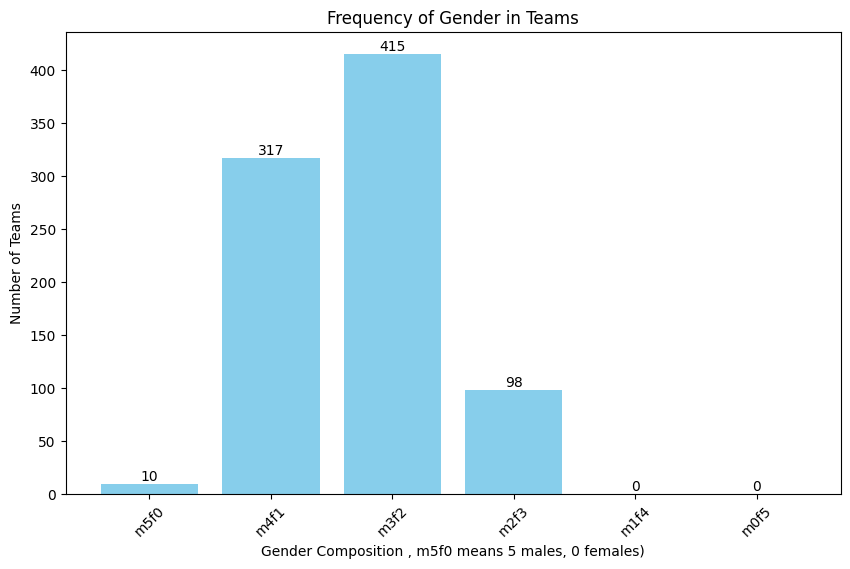

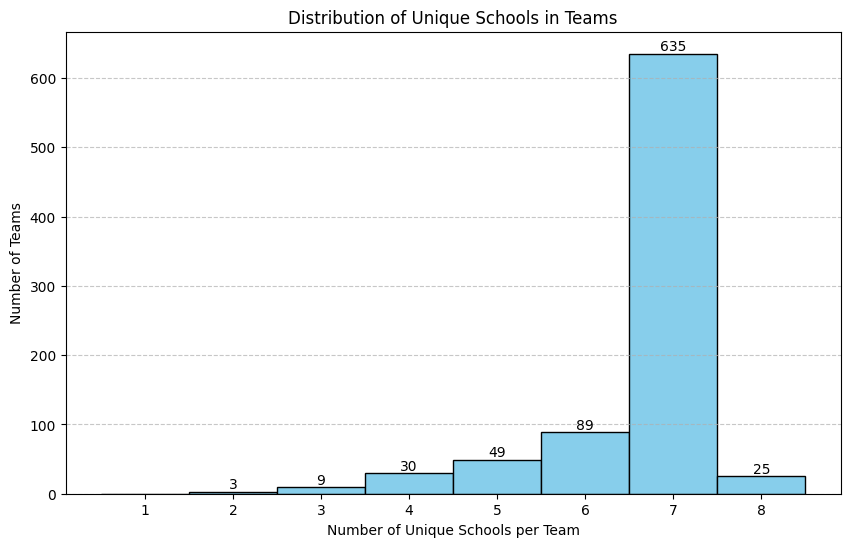

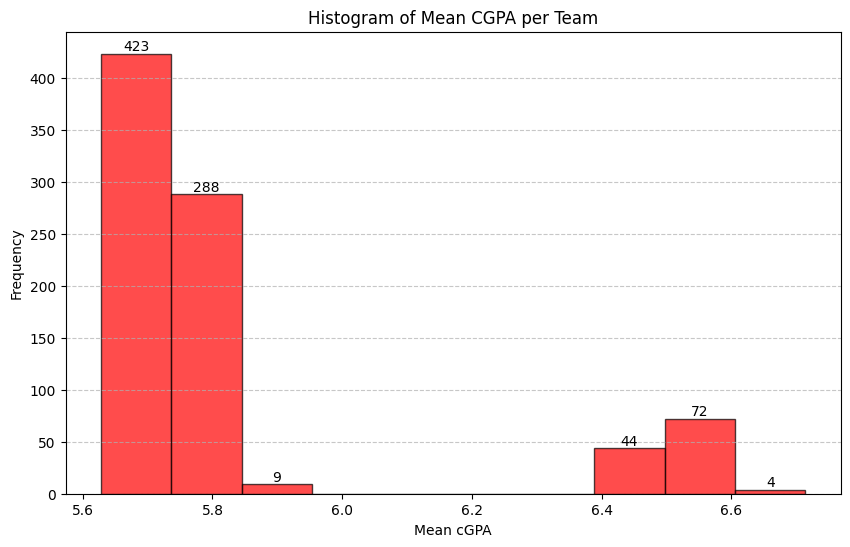

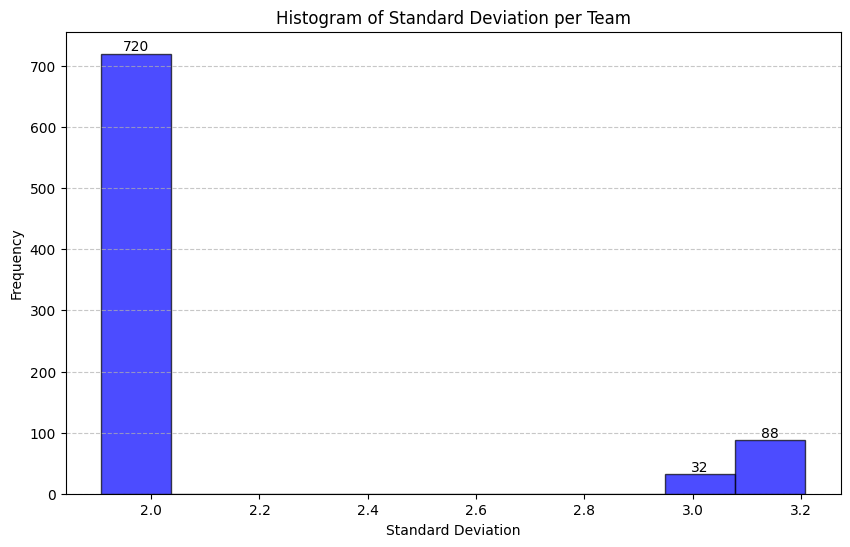

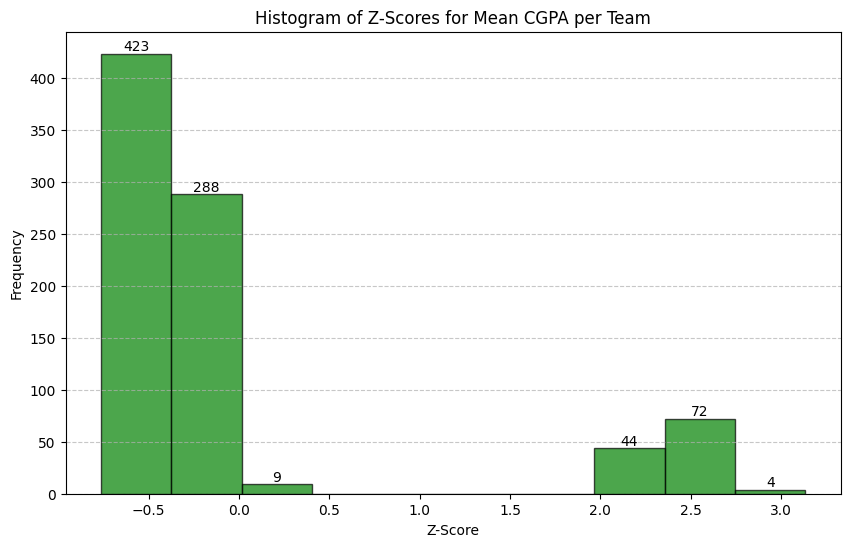

In [24]:
import matplotlib.pyplot as plt
import os


def visualize_data(group_division):
    all_sd = []
    all_deviations = []
    all_mean = []
    compiled_z_score = []
    compiled_gender = []
    unique_school_counts = []

    for i, x in enumerate(group_division):
        print(f"Team {i}")
        total_cgpa = 0
        ind_cgpa = []
        ind_gender = []
        ind_school = []
        for j in x:
            total_cgpa += j["CGPA"]
            ind_cgpa.append(j["CGPA"])
            ind_gender.append(j["Gender"])
            ind_school.append(j["School"])

        # for categorisation of gender
        compiled_gender.append(ind_gender)

        # for categorisation for diverse sch representation
        schools_in_team = set(sch for sch in ind_school)  # Use a set to get unique schools
        unique_school_counts.append(len(schools_in_team))  # Count of unique schools

        # for categorisation for CGPA
        ind_mean = total_cgpa / 5  # individual group mean CGPA
        deviations = [(each - ind_mean) ** 2 for each in ind_cgpa]
        variance = sum(deviations) / 5
        sd = (variance) ** 0.5
        all_sd.append(sd)
        all_mean.append(ind_mean)

        # printing of cgPA values for each group
        print(f"The mean CGPA of team {i}  is {ind_mean:.2f}")
        print(f"The variance of team {i}  is {variance:.5f}")
        print(f"The standard deviation of team {i}  is {sd:.5f}")
        print()

    # comparing individual team's mean, sd to observe the disparity in CGPA between each team and the population
    total_mean = sum(all_mean) / len(all_mean)
    population_deviations = [(each - total_mean) ** 2 for each in all_mean]
    population_sd = (sum(population_deviations) / len(all_mean)) ** 0.5

    # calculate z-score of every team
    for i in all_mean:
        z_score = (i - total_mean) / population_sd  # calculate z-score for each team and ammend to list for display
        compiled_z_score.append(z_score)

    # printing of the cohort's average cGPA, SD and zScore.
    print(f"The mean of the population is {total_mean:.2f}")
    print(f"The standard deviation of the population is {population_sd:.5f}")

    # dictionary to hold self-defined variable for gender categorisation and its count per category
    count_gender = {'m5f0': 0, 'm4f1': 0, 'm3f2': 0, 'm2f3': 0, 'm1f4': 0, 'm0f5': 0}
    for teamg in compiled_gender:
        count = sum(1 for gender in teamg if gender == "Male")
        if count > 5:
            count = 5
        count_gender[f'm{count}f{5 - count}'] += 1
    print(f"Gender count {count_gender}")

    # Visualisation
    os.makedirs("assets", exist_ok=True)  # make assets folder if it doesnt exist

    show_graph_gender(count_gender)  # bar graph for count_gender dict
    show_graph_school(unique_school_counts)  # bar graph for sch repre
    # show_graph_CGPA(related_list,title,window_title,xlabel,ylabel,color_for_bins):
    show_graph_CGPA(all_mean, "Histogram of Mean CGPA per Team",
                    "Histogram_for_Mean_CGPA_Per_Team",
                    "Mean cGPA",
                    "Frequency",
                    "red")

    show_graph_CGPA(all_sd, "Histogram of Standard Deviation per Team",
                    "Histogram_for_Standard_Deviation_Per_Team",
                    "Standard Deviation",
                    "Frequency",
                    "blue")
    show_graph_CGPA(compiled_z_score, "Histogram of Z-Scores for Mean CGPA per Team",
                    "Histogram_of_Z-Scores_for_Mean_CGPA_per_Team",
                    "Z-Score",
                    "Frequency",
                    "green")


def show_graph_gender(count_gender):
    # Data for the bar chart (this to visualize the count_gender dict)
    labels = list(count_gender.keys())  # Category labels using count_gender dictionary
    frequencies = list(count_gender.values())  # Count from dictionary for each category

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.canvas.manager.set_window_title("Bar Graph for Gender Representation")

    # Create the bar chart
    bars = ax.bar(labels, frequencies, color='skyblue')

    # Adding titles and labels
    ax.set_title("Frequency of Gender in Teams")
    ax.set_xlabel("Gender Composition , m5f0 means 5 males, 0 females)")
    ax.set_ylabel("Number of Teams")

    # Adding frequency labels on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of each bar
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    # Display the chart
    plt.xticks(rotation=45)
    plt.show()
    fig.savefig("assets/gender_representation.png")


def show_graph_school(unique_school_counts):
    fig = plt.figure(figsize=(10, 6))
    fig.canvas.manager.set_window_title("Bar Graph for School Representation")
    counts, bins, patches = plt.hist(unique_school_counts, bins=range(1, max(unique_school_counts) + 2),
                                     color='skyblue', edgecolor='black', align='left')

    plt.xticks(range(1, max(unique_school_counts) + 1))  # Set x-ticks
    plt.xlabel("Number of Unique Schools per Team")
    plt.ylabel("Number of Teams")
    plt.title("Distribution of Unique Schools in Teams")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding labels on top of each bar
    for count, x in zip(counts, bins):
        if count > 0:  # Only label if there's a bar
            plt.text(x, count, int(count), ha='center', va='bottom')

    plt.show()
    fig.savefig("assets/school_representation.png")


def show_graph_CGPA(related_list, title, window_title, xlabel, ylabel, color_for_bins):
    fig = plt.figure(figsize=(10, 6))
    fig.canvas.manager.set_window_title(window_title)
    counts, bins, patches = plt.hist(related_list, bins=10, color=color_for_bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add frequency labels on top of each bar
    for count, bin_edge in zip(counts, bins):
        if count > 0:
            plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, int(count), ha='center', va='bottom')

    plt.show()
    fig.savefig("assets/" + window_title + ".png")

visualize_data(group_division)
